# Lending club case study

## Abstract

**Lending club is the largest online loan marketplace, facilitating personal loans ,business loans, and financing of medical procedures.Borrowers can easily access lower interest rate loans through a fast online interface. The objective of analysis is to use the information about past loan applicants and find whether they are eligible for taking a loan or not**

In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [3]:
#using low memory flag to load columns with multiple data types.
data = pd.read_csv('S:\loan.csv',low_memory=False)
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [5]:
# The nmber of rows and columns
data.shape

(39717, 111)

In [6]:
data_describe = data.describe()

In [7]:
#Lower rows of data frame
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
# Describe() is used to genrally describe the function
data_describe

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

**From the above data_describe function we can find various amounts of data the details of every single column in the data**

# Data Cleaning

1. In order to clean the data we need to find out the columns that are not useful for us so we need to find out the data that has more null columns and elimate that and we need to make sure that the columns that has less unique values we can eliminate them as well

In [9]:
#Finding percentage of null or missing values

c = data.isnull().sum()

# The above command (isnull()) function is used so that we can find out how many null rows in an column are present and sum() is to find the sum of it.

i = len(data.index)

# i is the number of rows in the data

null_data = round(100*(c/i), 2)

#Printing columns which have more than 0% missing values

null_data[ null_data > 0 ]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


In [10]:
null_data[null_data == 0]

id                        0.00
member_id                 0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
pymnt_plan                0.00
url                       0.00
purpose                   0.00
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
total_acc                 0.00
initial_list_status       0.00
out_prncp                 0.00
out_prncp_inv             0.00
total_pymnt               0.00
total_py

## Drop the null data that are having more null columns 

In [11]:
# drop() is used to drop the data 
data.drop(null_data[ null_data > 10 ].index, axis=1, inplace=True)

In [12]:
# Finding data that has less unique values
data.nunique().sort_values(ascending=True).head(10)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
dtype: int64

In [13]:
#Drop the columns with only one unique value
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [14]:
#Finding number of unique values, printing high unique valued columns
data.nunique().sort_values(ascending=False).head(10)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
dtype: int64

In [15]:
data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)
data.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [16]:
#Finding percentage of null or missing values
null_data = round(100*(data.isnull().sum()/len(data.index)), 2)
null_data[ null_data > 0 ]

emp_title              6.19
emp_length             2.71
title                  0.03
revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

In [17]:
# So the dropna() on a DataFrame to remove rows with missing values in the specified columns:

data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

#After striping the data that is null date, If you observe the output of data we can see null data is Replaced

null_data = round(100*(data.isnull().sum()/len(data.index)), 2)
null_data[ null_data > 0 ]

emp_title   3.68
title       0.03
dtype: float64

**If loan_status is equal to Current then the payments are regular and we can ignore them**

In [18]:
 data = data[data.loan_status != 'Current']

#data = data[data.drop(loan_status != 'Current')]

In [19]:
# There are two loan tenures 
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [20]:
data['term']=data.term.str.strip()
data.term.unique()

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\2407415889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['term']=data.term.str.strip()


array(['36 months', '60 months'], dtype=object)

In [21]:
data.shape

(36800, 35)

In [22]:
data.drop(['verification_status','sub_grade','inq_last_6mths','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','last_pymnt_amnt','pub_rec','open_acc','inq_last_6mths','delinq_2yrs'], axis=1, inplace=True)

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\2804173345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['verification_status','sub_grade','inq_last_6mths','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','last_pymnt_amnt','pub_rec','open_acc','inq_last_6mths','delinq_2yrs'], axis=1, inplace=True)


In [23]:
# Finding datatype in all coulmns
data.dtypes

id                        int64
member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
issue_d                  object
loan_status              object
url                      object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
earliest_cr_line         object
pub_rec_bankruptcies    float64
dtype: object

In [24]:
data.shape

(36800, 23)

In [25]:
data.drop(['annual_inc','member_id','url','title','emp_title'],axis=1,inplace=True)

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\1387437907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['annual_inc','member_id','url','title','emp_title'],axis=1,inplace=True)


In [26]:
data.shape

(36800, 18)

### Trimming data and converting data into proper format

In [27]:
#stripping '%' value
data['int_rate'] = data.int_rate.str.strip('%').astype(float)

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\1185142324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['int_rate'] = data.int_rate.str.strip('%').astype(float)


In [28]:
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\2952866251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
C:\Users\raman\AppData\Local\Temp\ipykernel_7476\2952866251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)
C:\Users\raman\AppData\Local\Temp\ipykernel_7476\2952866251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a

In [29]:
# Converted to proper datatypes for analysis
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
emp_length                      object
home_ownership                  object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
earliest_cr_line        datetime64[ns]
pub_rec_bankruptcies           float64
dtype: object

In [30]:
#issue_d column
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\3996707717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_d_year'] = data.issue_d.dt.year
C:\Users\raman\AppData\Local\Temp\ipykernel_7476\3996707717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['issue_d_month'] = data.issue_d.dt.strftime('%b')
C:\Users\raman\AppData\Local\Temp\ipykernel_7476\3996707717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [31]:
data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\426588926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)


In [32]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,approved_loan_amnt_ratio
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,10+ years,RENT,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,1985-01-01,0.00,2011,Dec,3,1985,Jan,99.50
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,< 1 year,RENT,2011-12-01,Charged Off,car,309xx,GA,1.00,1999-04-01,0.00,2011,Dec,3,1999,Apr,100.00
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,10+ years,RENT,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,2001-11-01,0.00,2011,Dec,3,2001,Nov,100.00
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,10+ years,RENT,2011-12-01,Fully Paid,other,917xx,CA,20.00,1996-02-01,0.00,2011,Dec,3,1996,Feb,100.00
5,1075269,5000,5000,5000.00,36 months,7.90,156.46,A,3 years,RENT,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,2004-11-01,0.00,2011,Dec,3,2004,Nov,100.00


In [33]:
# Converted date formats for analysis
data.dtypes

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
emp_length                          object
home_ownership                      object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
earliest_cr_line            datetime64[ns]
pub_rec_bankruptcies               float64
issue_d_year                        object
issue_d_month                       object
issue_d_weekday                     object
earliest_cr_line_year               object
earliest_cr_line_month              object
approved_lo

In [34]:
data.shape

(36800, 24)

# Data Analysis 


## Univariate analysis :

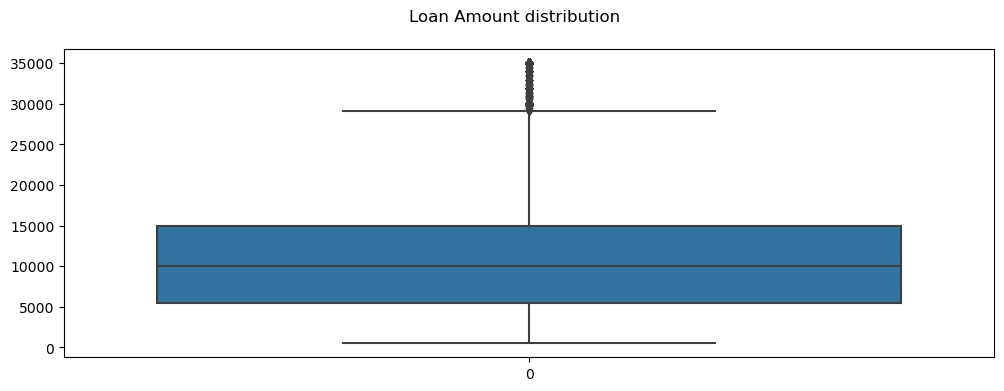

In [35]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,1,1)
sns.boxplot(data=data.loan_amnt)
plt.suptitle('Loan Amount distribution')
plt.show()

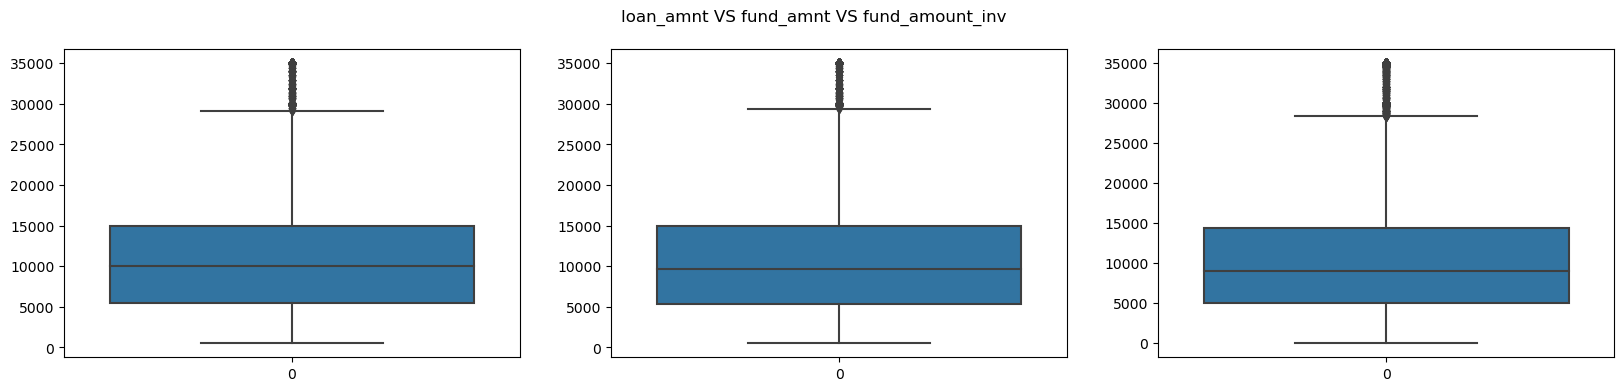

In [36]:
#Increasing the figure size of plot
plt.figure(figsize=(20,4))
#Setting subplot index
plt.subplot(1,3,1)
sns.boxplot(data=data.loan_amnt)
plt.subplot(1,3,2)
sns.boxplot(data=data.funded_amnt)
#Single title for both subplots.
#sns.boxplot(data=data.funded_amnt_inv)
#plt.subplot(1,3,3)
plt.subplot(1,3,3)
sns.boxplot(data=data.funded_amnt_inv)
plt.suptitle('loan_amnt VS fund_amnt VS fund_amount_inv')
plt.show()

In [37]:
#Stats of laon amount
c=data.loan_amnt.describe(percentiles=[0.001,0.2,0.4,0.6,0.8,0.999])
d=data.funded_amnt.describe(percentiles=[0.001,0.2,0.4,0.6,0.8,0.999])
e=data.funded_amnt_inv.describe(percentiles=[0.001,0.2,0.4,0.6,0.8,0.999])

In [38]:
print(c)

count   36800.00
mean    11149.54
std      7369.86
min       500.00
0.1%     1000.00
20%      5000.00
40%      8000.00
50%     10000.00
60%     11500.00
80%     16000.00
99.9%   35000.00
max     35000.00
Name: loan_amnt, dtype: float64


In [39]:
print(d)

count   36800.00
mean    10880.79
std      7109.16
min       500.00
0.1%     1000.00
20%      5000.00
40%      7750.00
50%      9600.00
60%     11000.00
80%     16000.00
99.9%   35000.00
max     35000.00
Name: funded_amnt, dtype: float64


In [40]:
print(e)

count   36800.00
mean    10439.06
std      7008.52
min         0.00
0.1%        0.00
20%      4725.00
40%      7200.00
50%      9000.00
60%     10250.00
80%     15067.77
99.9%   35000.00
max     35000.00
Name: funded_amnt_inv, dtype: float64


### Conclusion from the above data

- Considering the above box plots 95% of the time the loan amount is being funded properly but sometimes amount committed to that loan at that point in time is not disbursed properly because of some reasons.

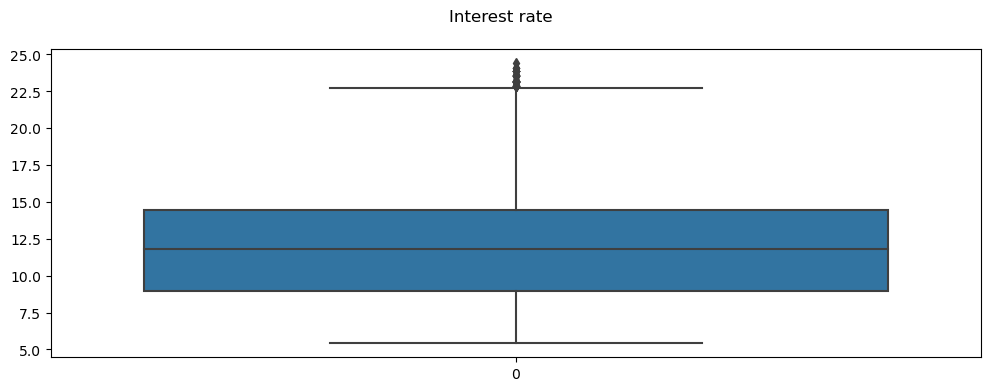

In [41]:
plt.figure(figsize=(12,4))
plt.subplot(1,1,1)
sns.boxplot(data=data.int_rate)
plt.suptitle('Interest rate')
plt.show()

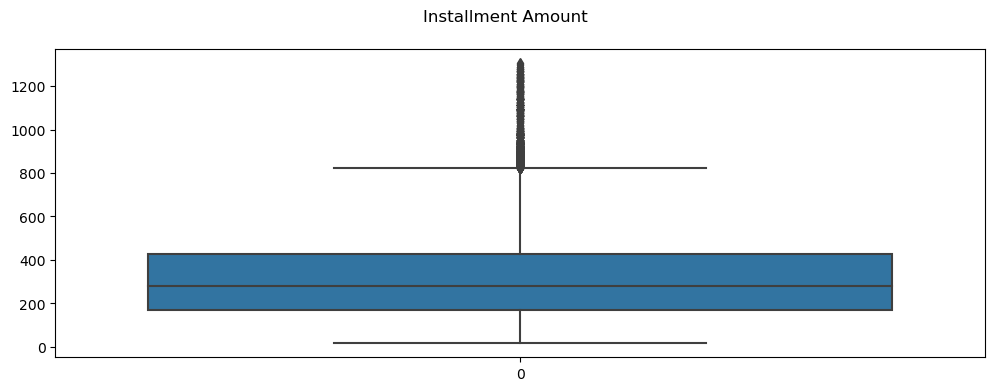

In [42]:
plt.figure(figsize=(12,4))
sns.boxplot(data=data.installment)
plt.subplot(1,1,1)
plt.suptitle("Installment Amount")
plt.show()

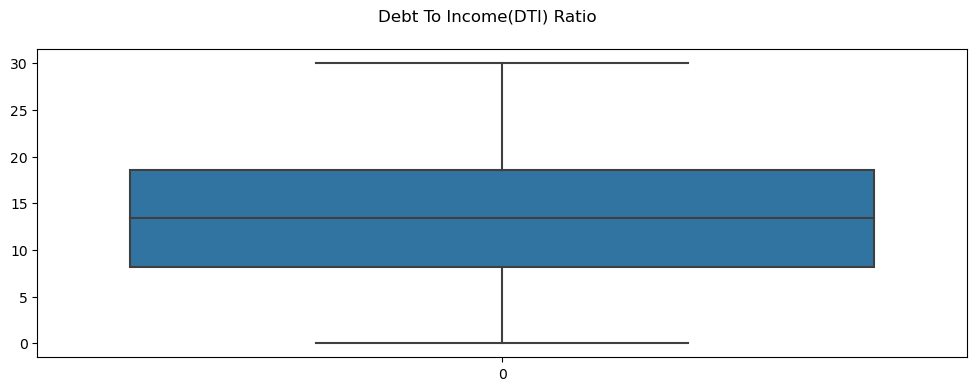

In [43]:
#var = 'dti'
#Probability / Percentage of each values
#prob_df = data[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
plt.figure(figsize=(12,4))
plt.subplot(1,1,1)
sns.boxplot(data=data.dti)
#plt.xlabel(var)
#plt.ylabel('Proportion')
plt.suptitle('Debt To Income(DTI) Ratio')
plt.show()

In [44]:
Dti= data.dti
c= [Dti[Dti>30]]
print(c)

[Series([], Name: dti, dtype: float64)]


**Conclusion** : Debt to Income ratio is not greater than 30 percent so that is a good sign.

## Segmented Univariate Analysis :

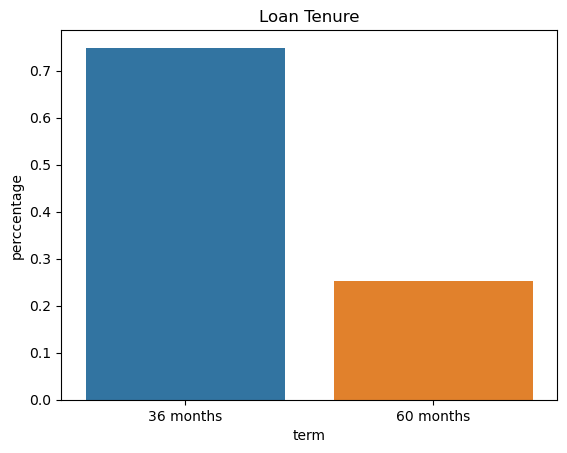

In [45]:
var = 'term'
#Probability / Percentage of each values
prob = data[var].value_counts(normalize=True).reset_index()
plt.subplot(1,1,1)
sns.barplot(x='index', y=var, data=prob)
plt.xlabel(var)
plt.ylabel('perccentage')
plt.title('Loan Tenure')
plt.show()
#sns.countplot(data.term)
#plt.subplot(1,2,2)
#plt.suptitle('countplot of Loan Tenure')

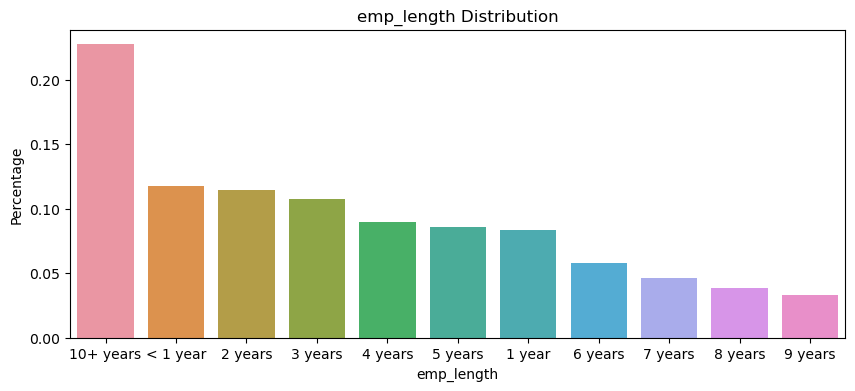

In [46]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Percentage')
plt.title(var+' Distribution')
plt.show()

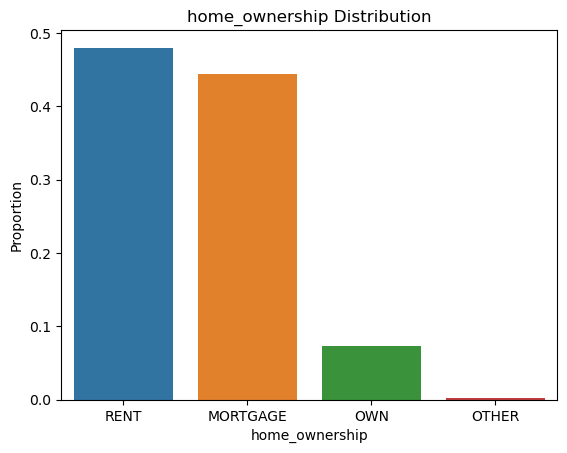

In [47]:
var = 'home_ownership'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\226632247.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['issue_d_month','issue_d_year'],axis=1, inplace=True)


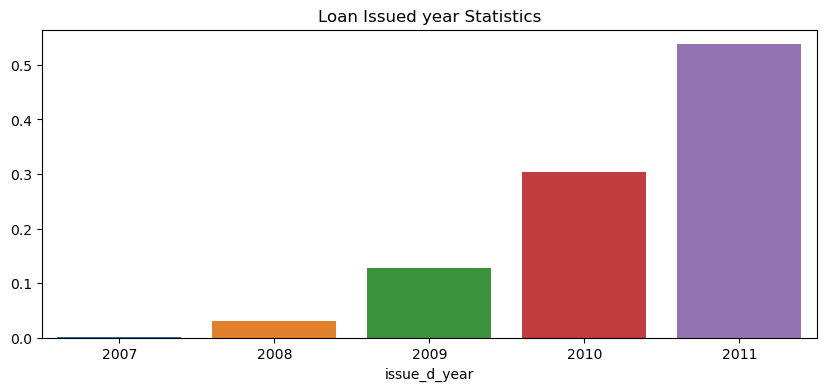

In [48]:
var = 'issue_d_year'
#Probability / Percentage of each values
time = data[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
sns.barplot(x='index', y=var, data=time)
plt.xlabel(var)
plt.ylabel('')
plt.title('Loan Issued year Statistics')

#Drop the columns like issued Year and month

data.drop(['issue_d_month','issue_d_year'],axis=1, inplace=True)

In [49]:
data.drop(['earliest_cr_line_year','earliest_cr_line_month'],axis=1, inplace=True)

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\3973810374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['earliest_cr_line_year','earliest_cr_line_month'],axis=1, inplace=True)


In [50]:
data.shape

(36800, 20)

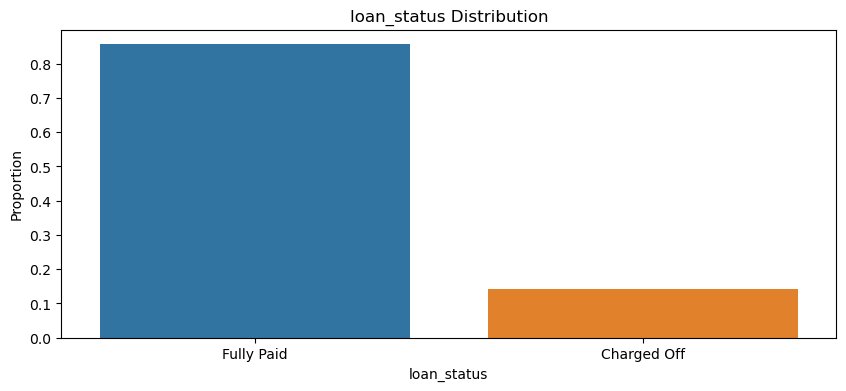

In [51]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

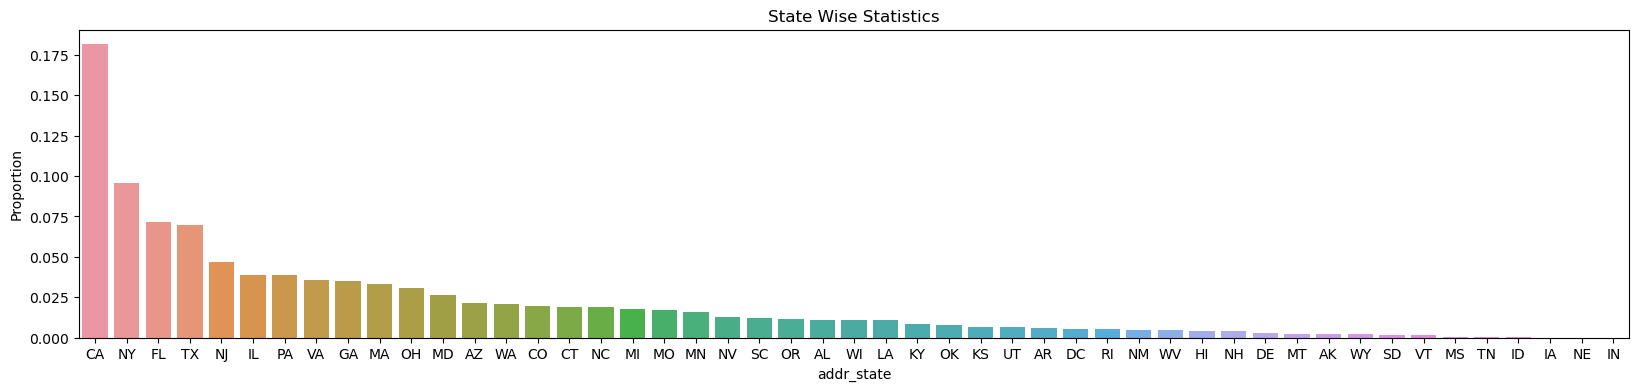

In [52]:
plt.figure(figsize=(20,4))
co = 'addr_state'
#Probability / Percentage of each values
prob_df = data[co].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=co, data=prob_df)
plt.xlabel(co)
plt.ylabel('Proportion')
plt.title('State Wise Statistics')
plt.show()

## Conclusion:
- Higher the population higher the number of loan seekers.

# Bivariate Analysis :

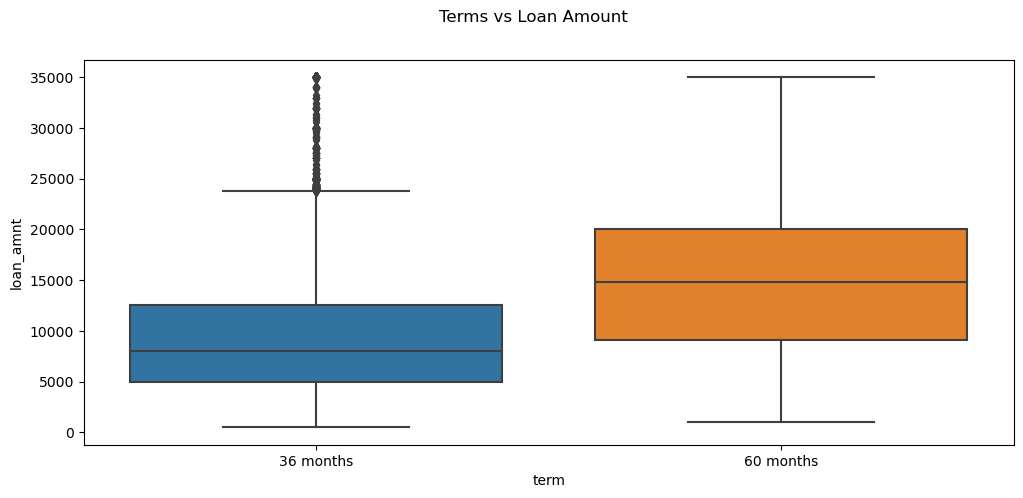

In [53]:
plt.figure(figsize=(12,5))
plt.subplot(1,1,1)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.suptitle('Terms vs Loan Amount')
plt.show()

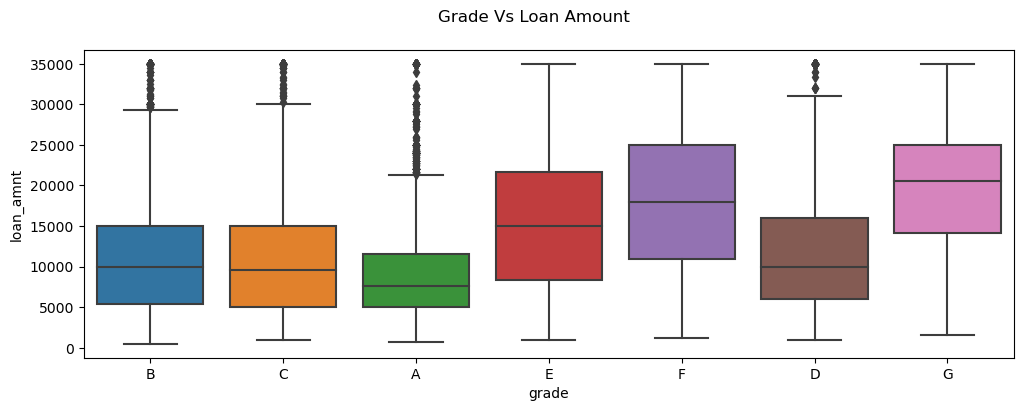

In [54]:
plt.figure(figsize=(12,4))
plt.subplot(1,1,1)
sns.boxplot(x='grade',y=data.loan_amnt,data=data)
plt.suptitle('Grade Vs Loan Amount')
plt.show()

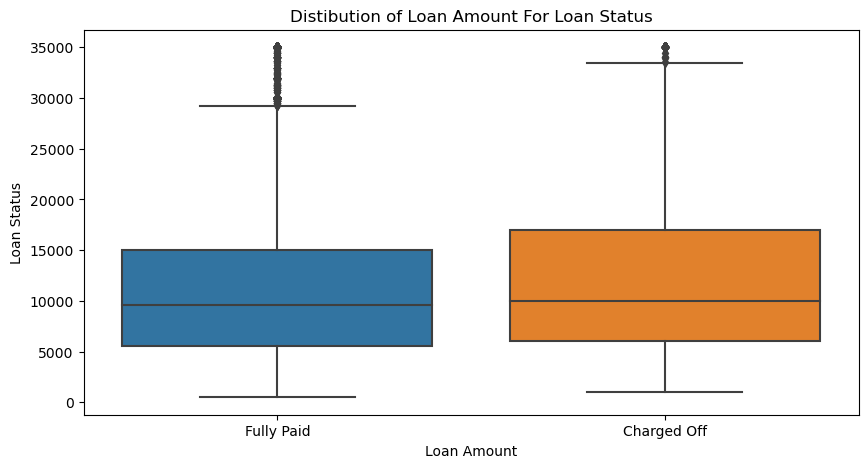

In [55]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=data,y='loan_amnt',x='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

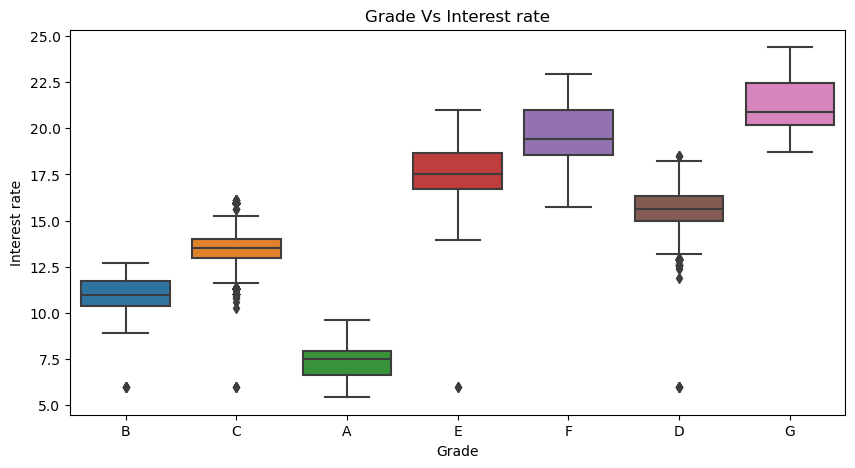

In [56]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='grade',y='int_rate')
plt.xlabel('Grade')
plt.ylabel('Interest rate')
plt.title('Grade Vs Interest rate',fontsize=12)
plt.show()

## Conclusion

- Higher the Grade, higher the median of Loan amount taken and granted.

Text(0.5, 1.0, 'purpose vs Interest Rate')

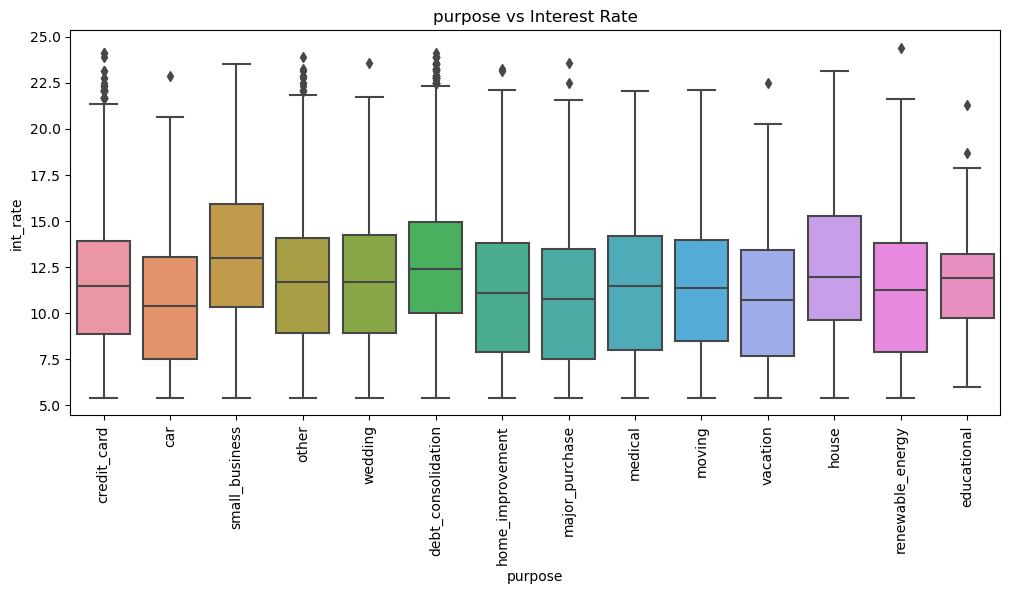

In [57]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data,x='purpose',y='int_rate')
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')

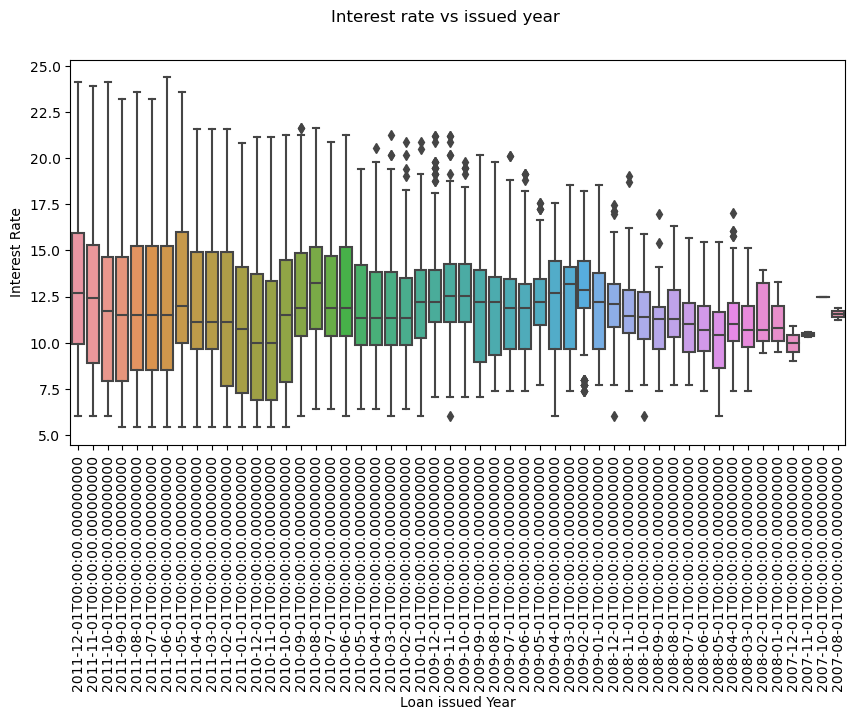

In [58]:
#Issue_d
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.boxplot(data=data,x='issue_d',y='int_rate')
plt.xlabel('Loan issued Year')
plt.ylabel('Interest Rate')
plt.suptitle('Interest rate vs issued year')
plt.xticks(rotation=90)
plt.show()

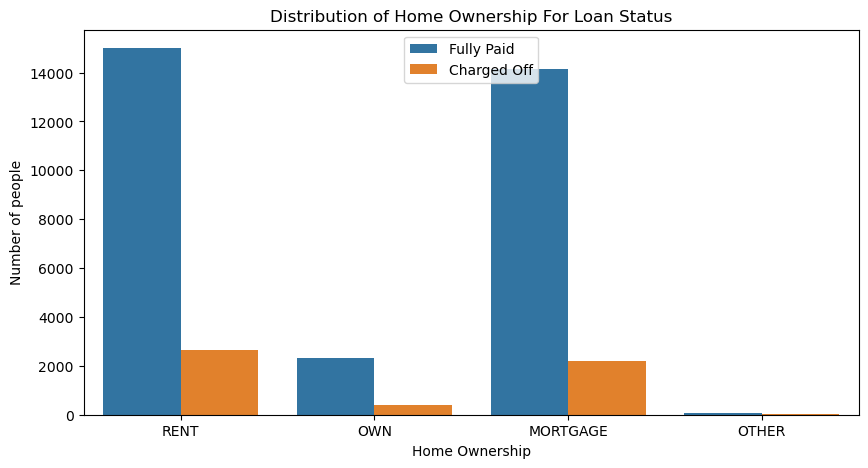

In [59]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data = data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Number of people')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

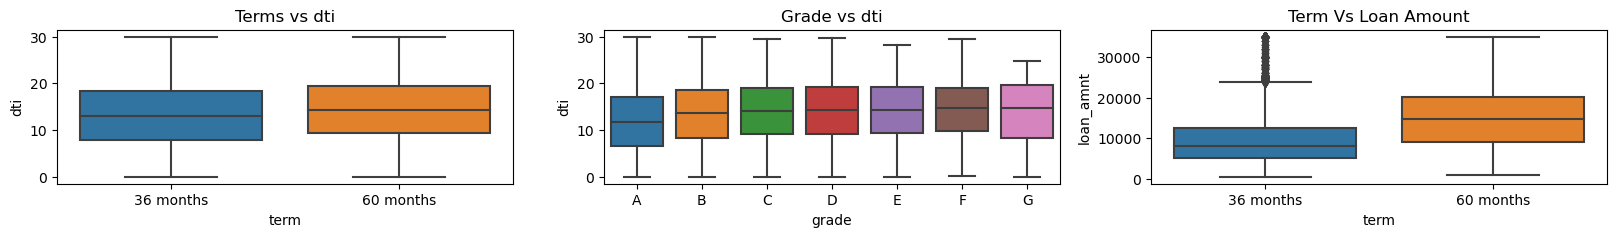

In [60]:
plt.figure(figsize=(20,2))
plt.subplot(131)
sns.boxplot(x='term', y=data.dti, data=data)
plt.title('Terms vs dti')
plt.subplot(132)
plt.title('Grade vs dti')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.dti, order = grade_ord, data=data)
plt.subplot(133)
sns.boxplot(x='term',y='loan_amnt',data=data)
plt.title('Term Vs Loan Amount')
plt.show()

Text(0.5, 1.0, 'home_ownership vs dti')

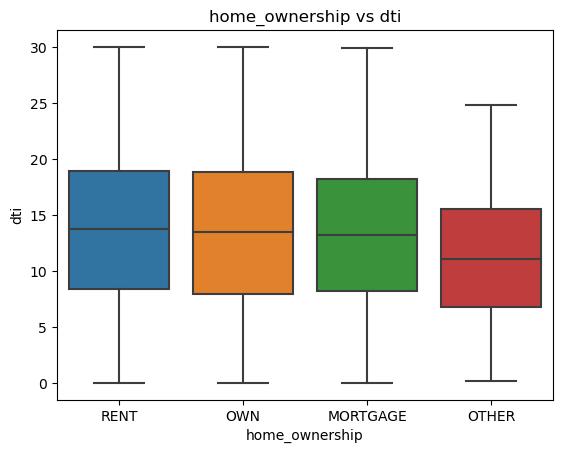

In [61]:
plt.subplot(111)
sns.boxplot(x='home_ownership', y=data.dti, data=data)
plt.title('home_ownership vs dti')

Text(0.5, 1.0, 'home_ownership vs dti')

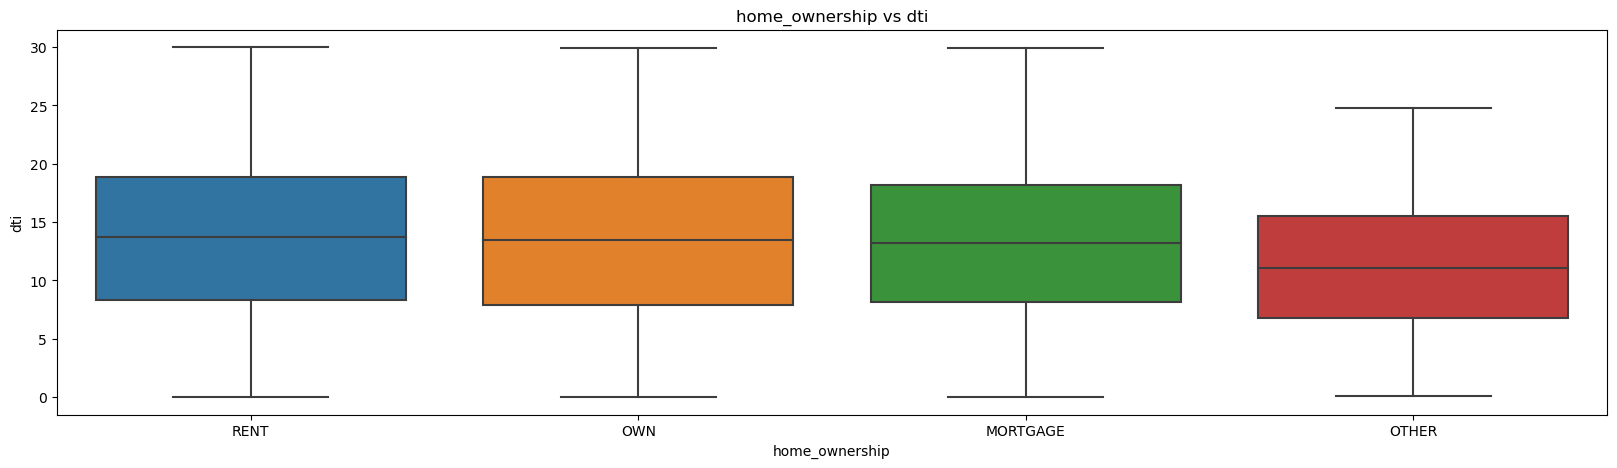

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(111)
sns.boxplot(x='home_ownership', y=data.dti, data=data)
plt.title('home_ownership vs dti')

Text(0.5, 1.0, 'purpose vs int_rate')

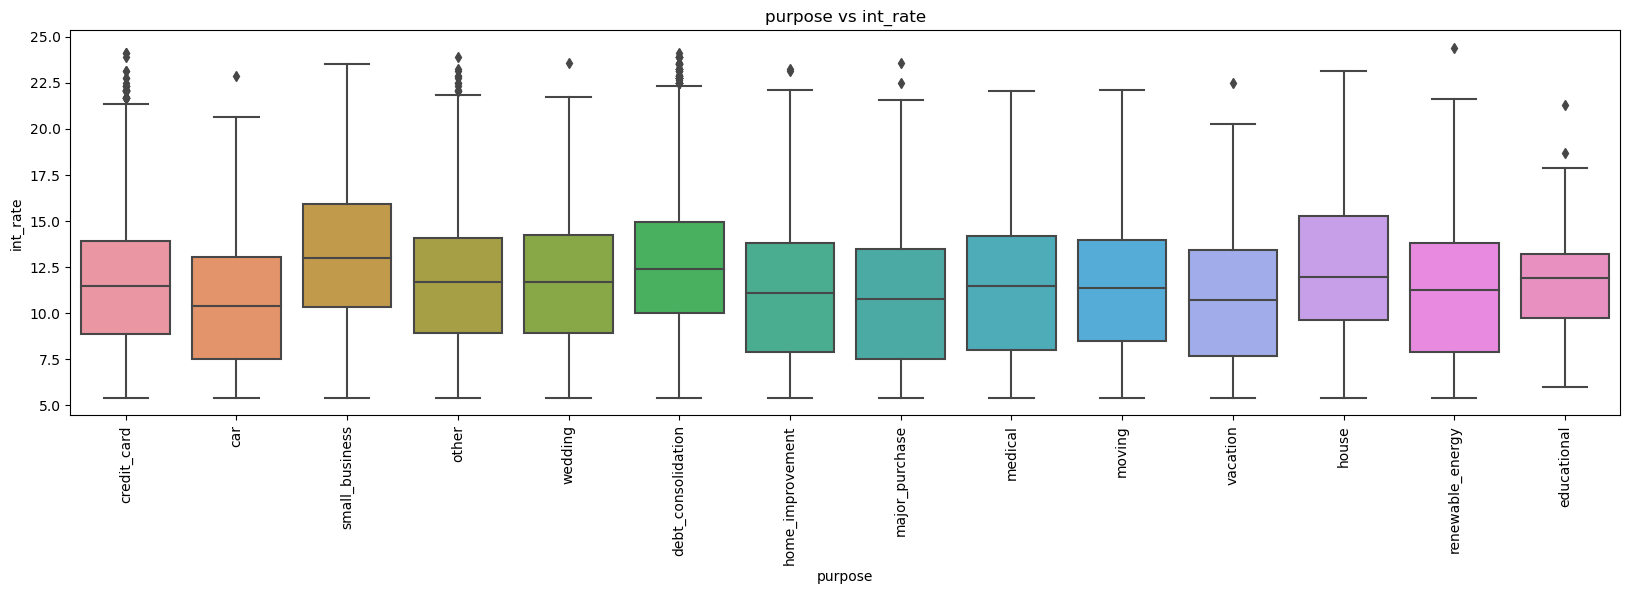

In [63]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.int_rate, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs int_rate')

Text(0.5, 1.0, 'purpose vs dti')

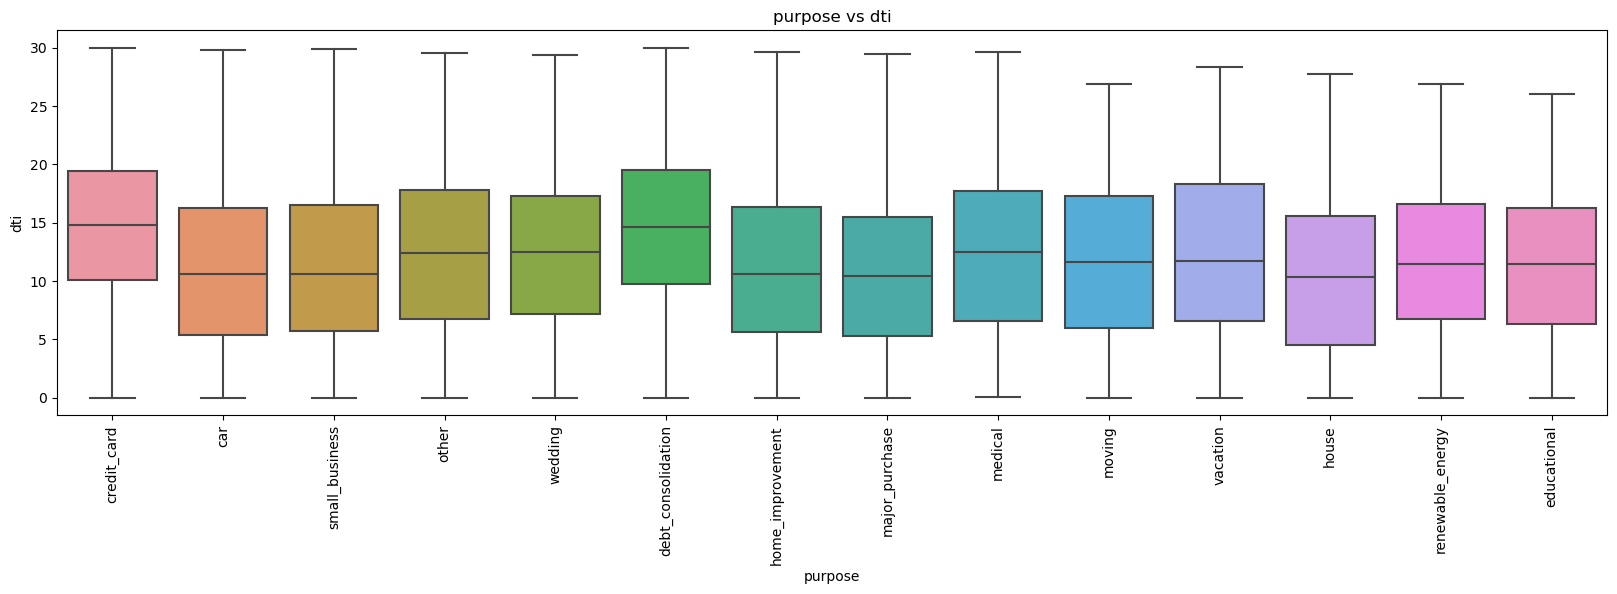

In [64]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.dti, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

Text(0.5, 1.0, 'emp_length vs dti')

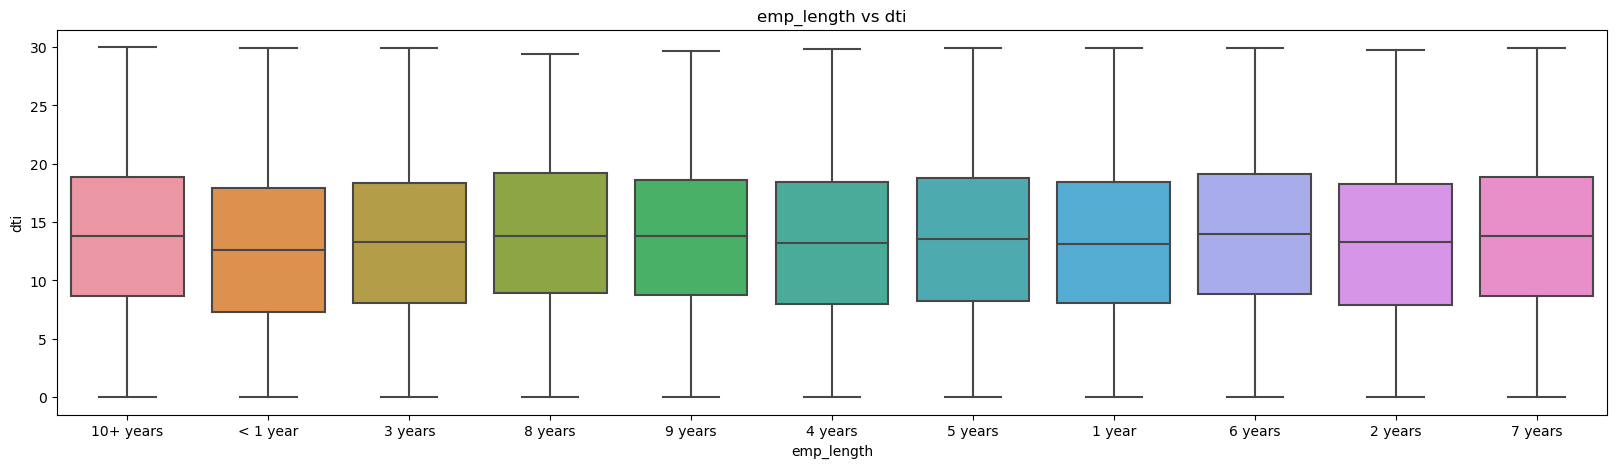

In [65]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.dti, data=data)
plt.title('emp_length vs dti')

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\4274992404.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Term vs Loan status')

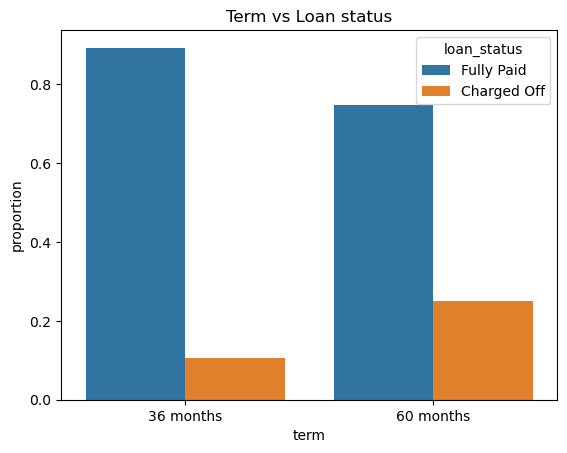

In [66]:
#Proportion of values for each category
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

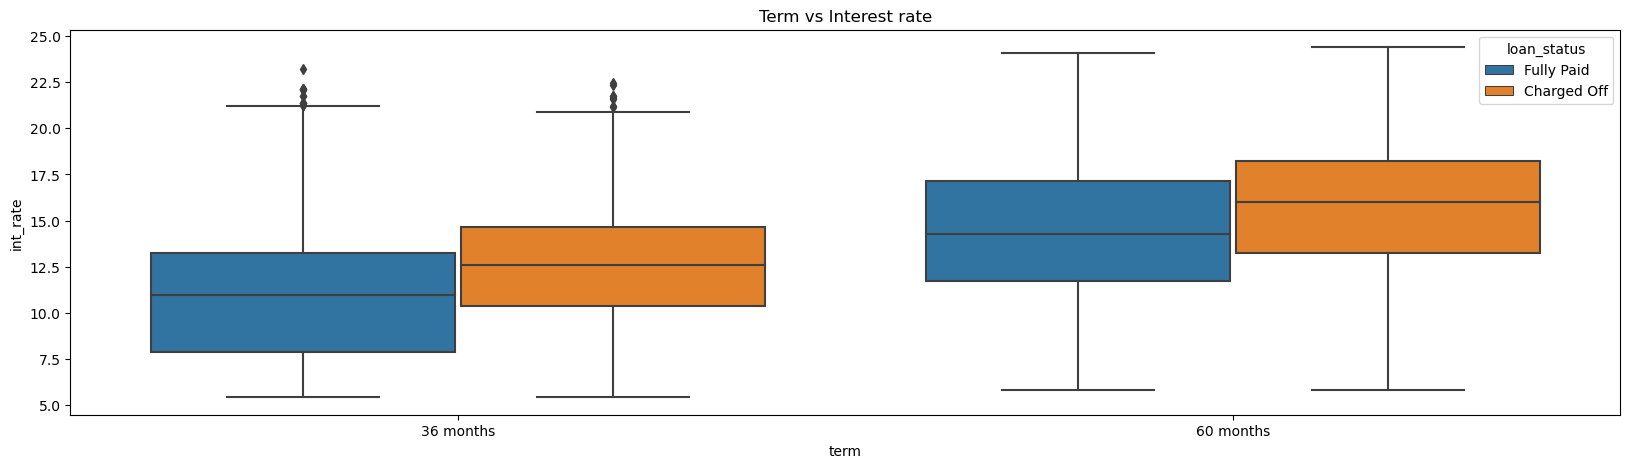

In [67]:
plt.figure(figsize=(20,5))
plt.subplot(111)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest rate')
plt.show()

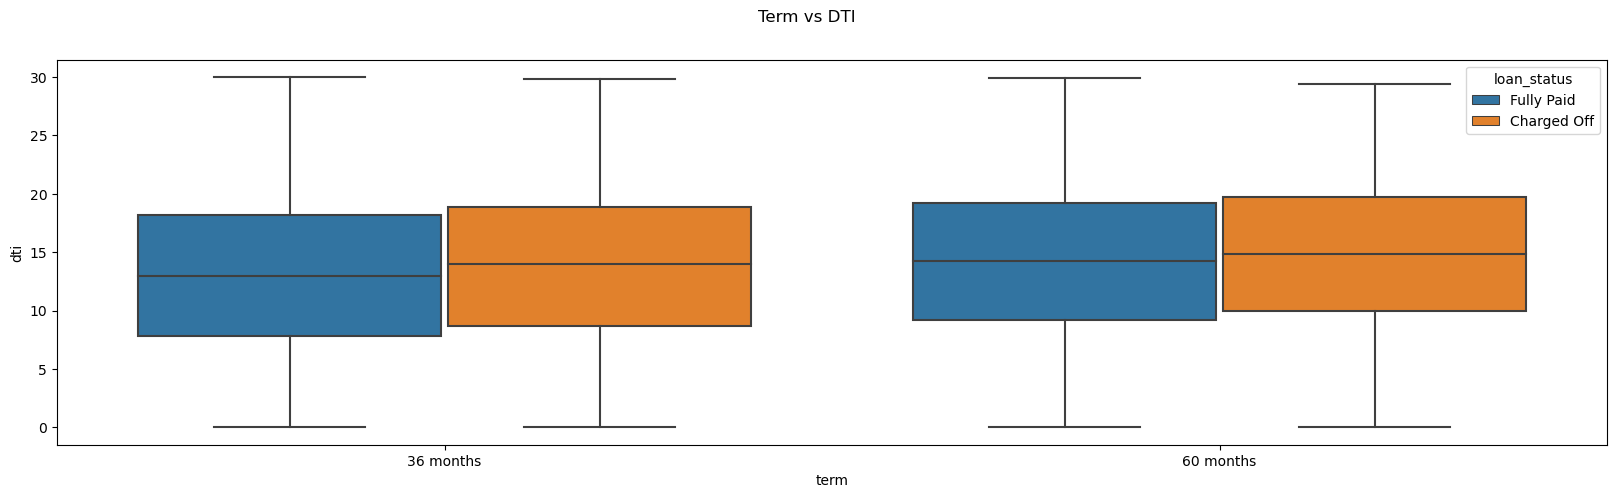

In [68]:
plt.figure(figsize=(20,5))
plt.subplot(111)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.suptitle('Term vs DTI')
plt.show()

In [69]:
#Sorting Grades from A to G
grade_ord = data.grade.unique()
grade_ord.sort()

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\2522014393.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Grade vs Loan status')

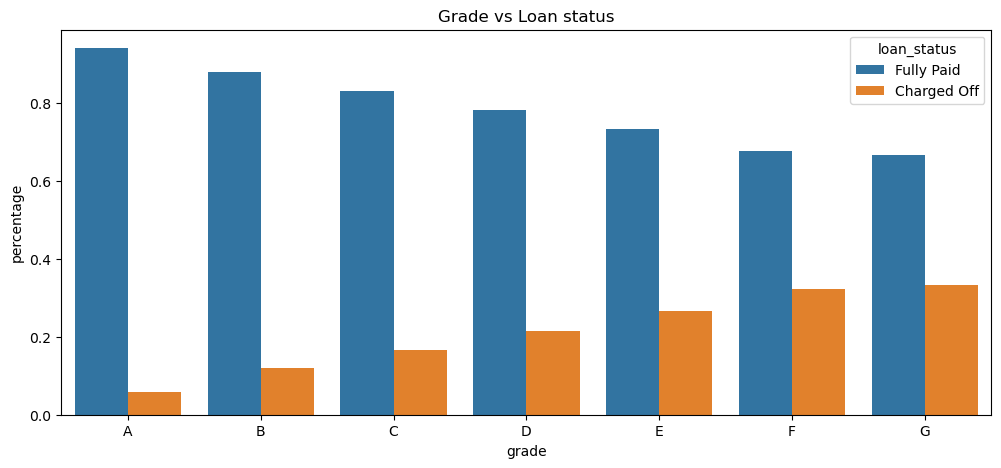

In [70]:
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

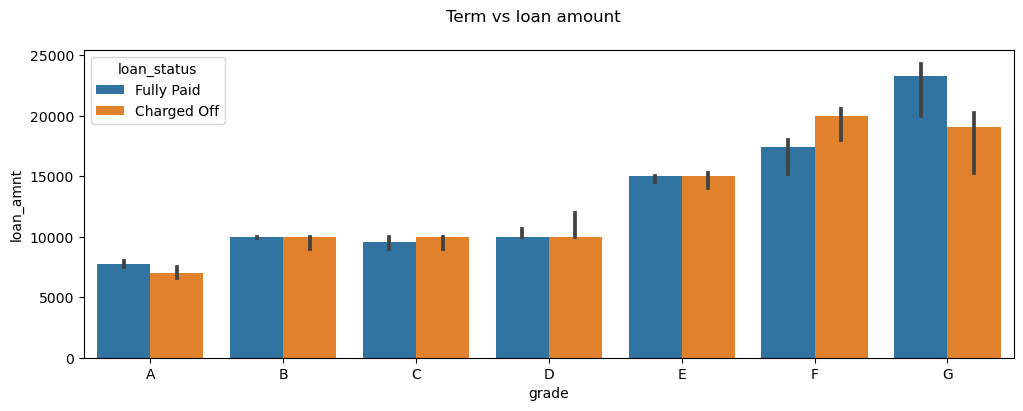

In [71]:
plt.figure(figsize=(12,4))
plt.subplot(111)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\2695638706.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Home Ownership vs Loan status')

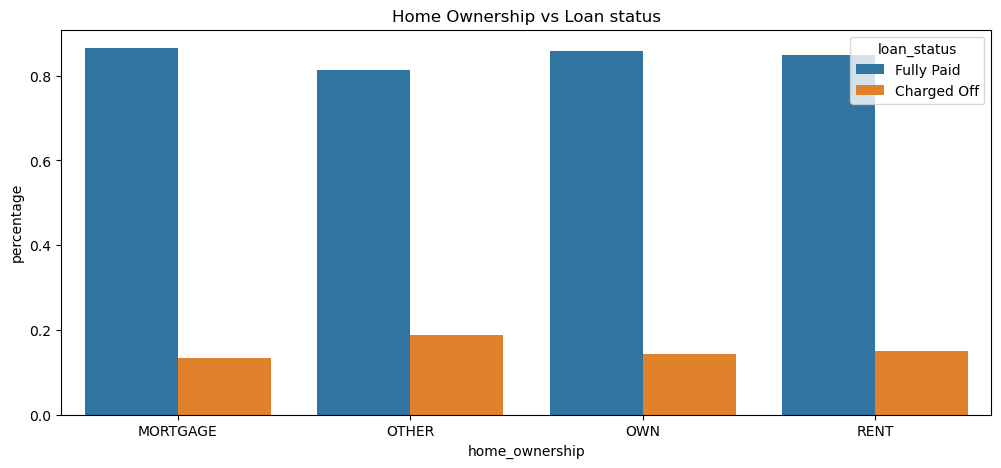

In [72]:
df = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')

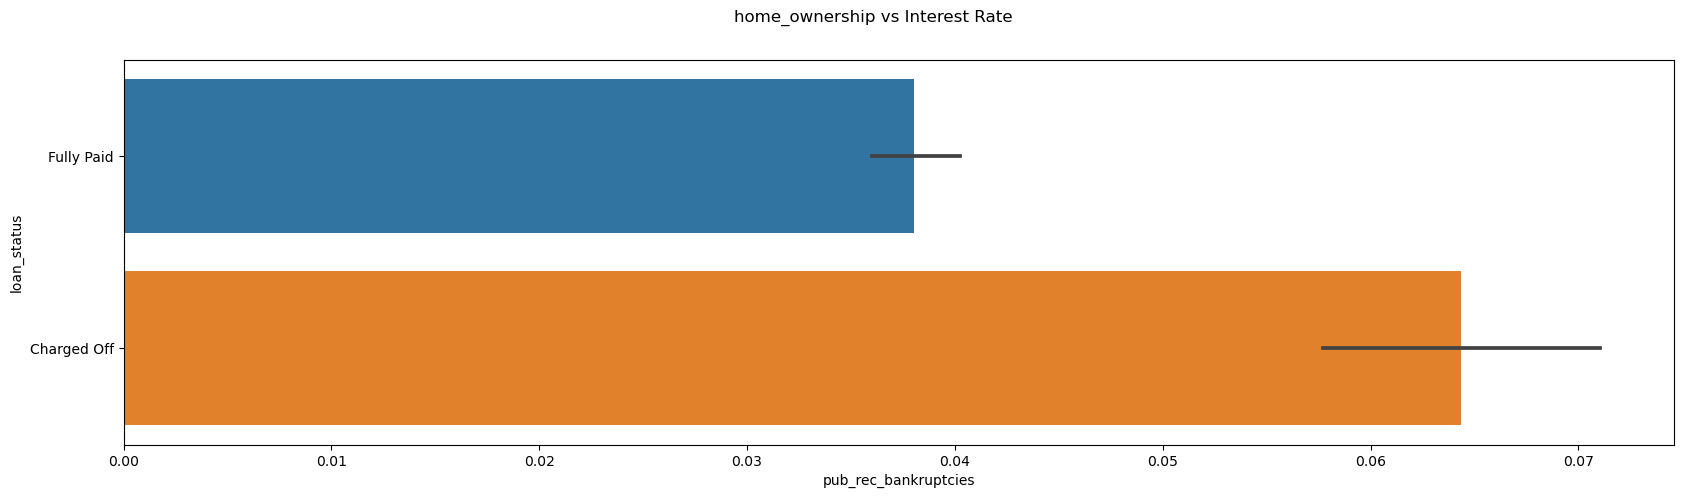

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(111)
sns.barplot(x=data.pub_rec_bankruptcies,y=data.loan_status)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

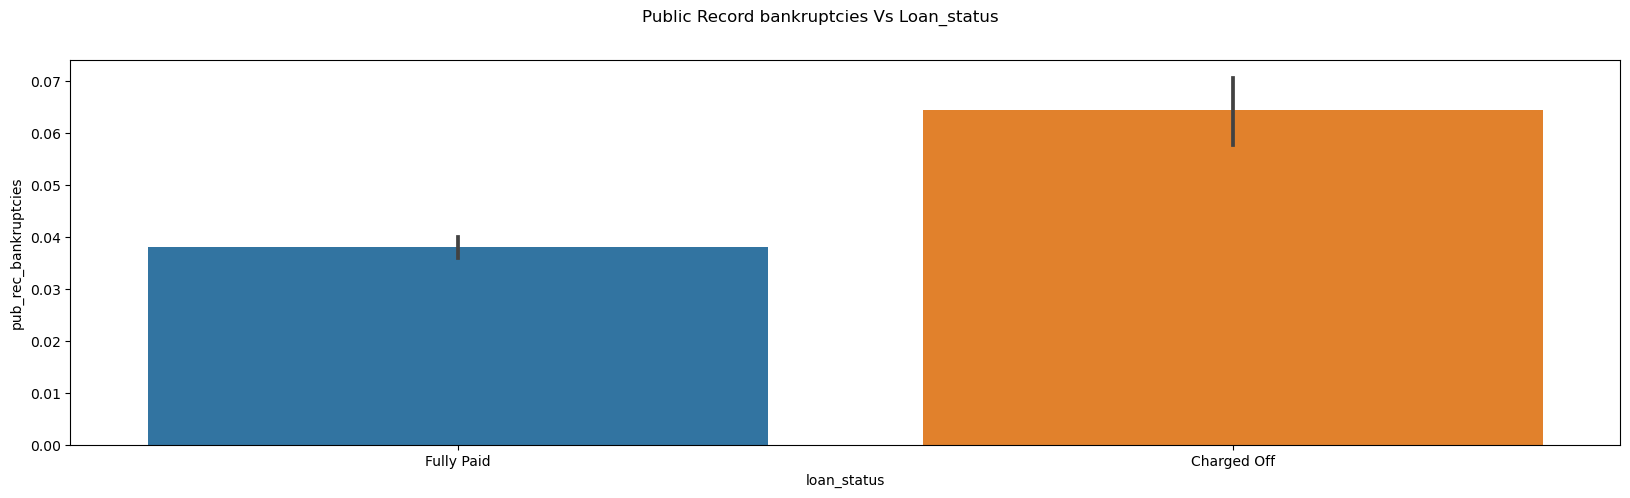

In [74]:
plt.figure(figsize=(20,5))
plt.subplot(111)
sns.barplot(y=data.pub_rec_bankruptcies,x=data.loan_status)
plt.suptitle('Public Record bankruptcies Vs Loan_status')
plt.show()

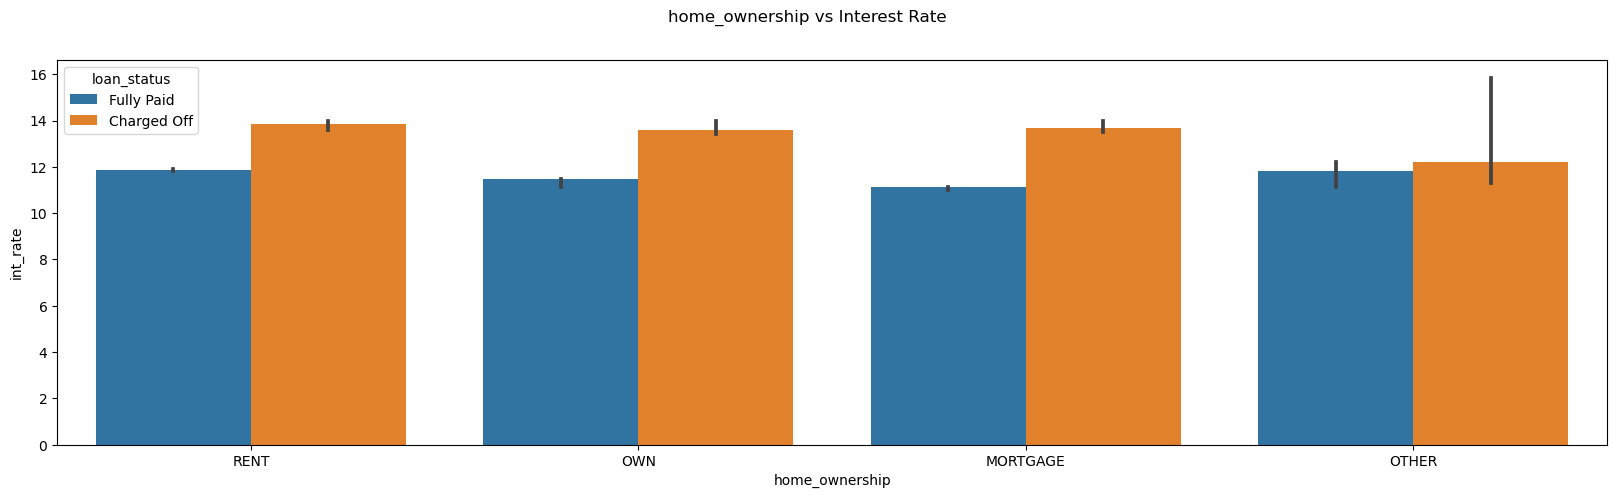

In [75]:
plt.figure(figsize=(20,5))
plt.subplot(111)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\1280901218.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['percentage'] = df.groupby('loan_status').transform(lambda x: x/x.sum())


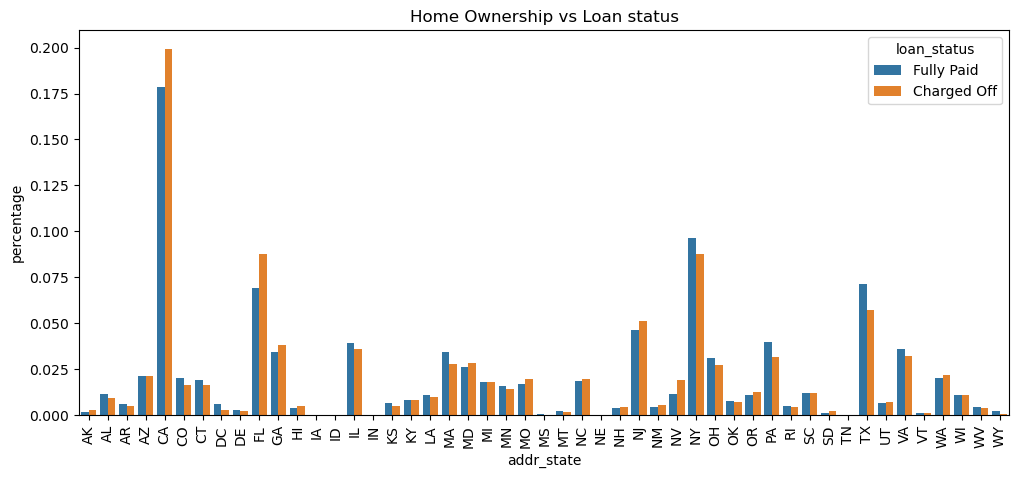

In [76]:
df = data.groupby(['addr_state', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('loan_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='addr_state', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.xticks(rotation=90)
plt.title('Home Ownership vs Loan status')
plt.show()

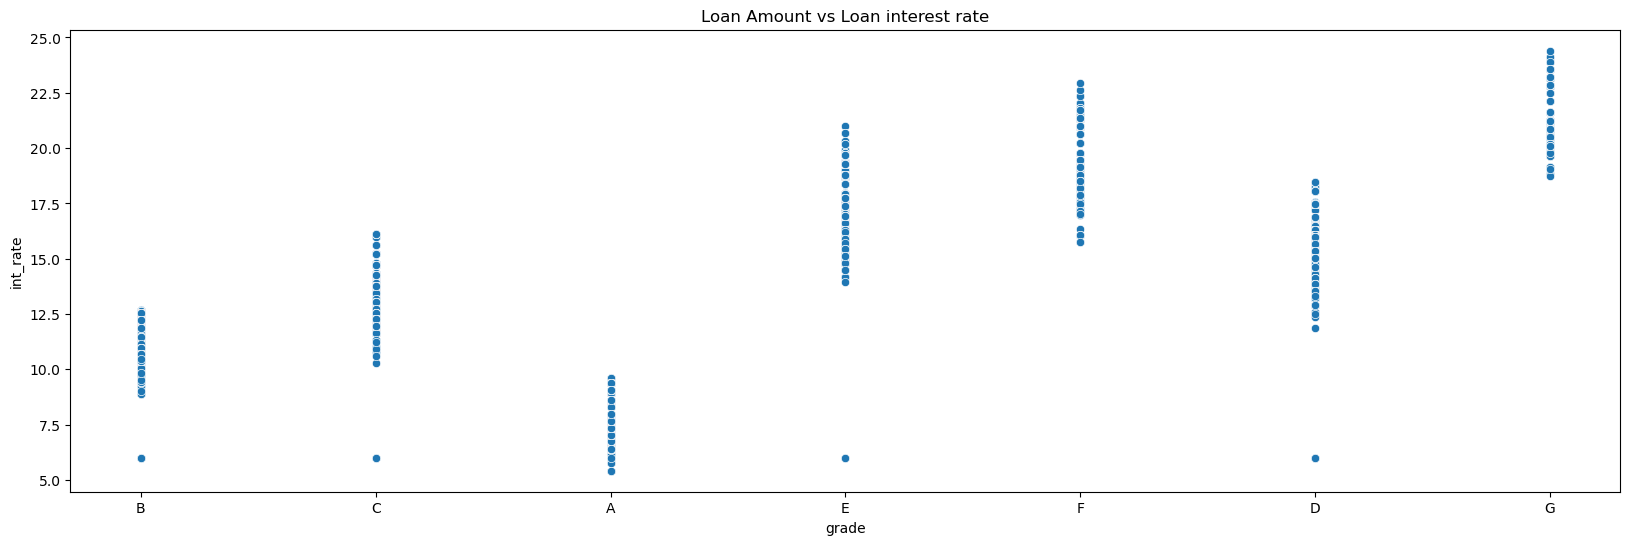

In [77]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='grade',y='int_rate',data=data)
plt.title('Loan Amount vs Loan interest rate')
plt.show()

## Multi Variate Analysis

C:\Users\raman\AppData\Local\Temp\ipykernel_7476\964333457.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),annot=True,cmap='Greens')


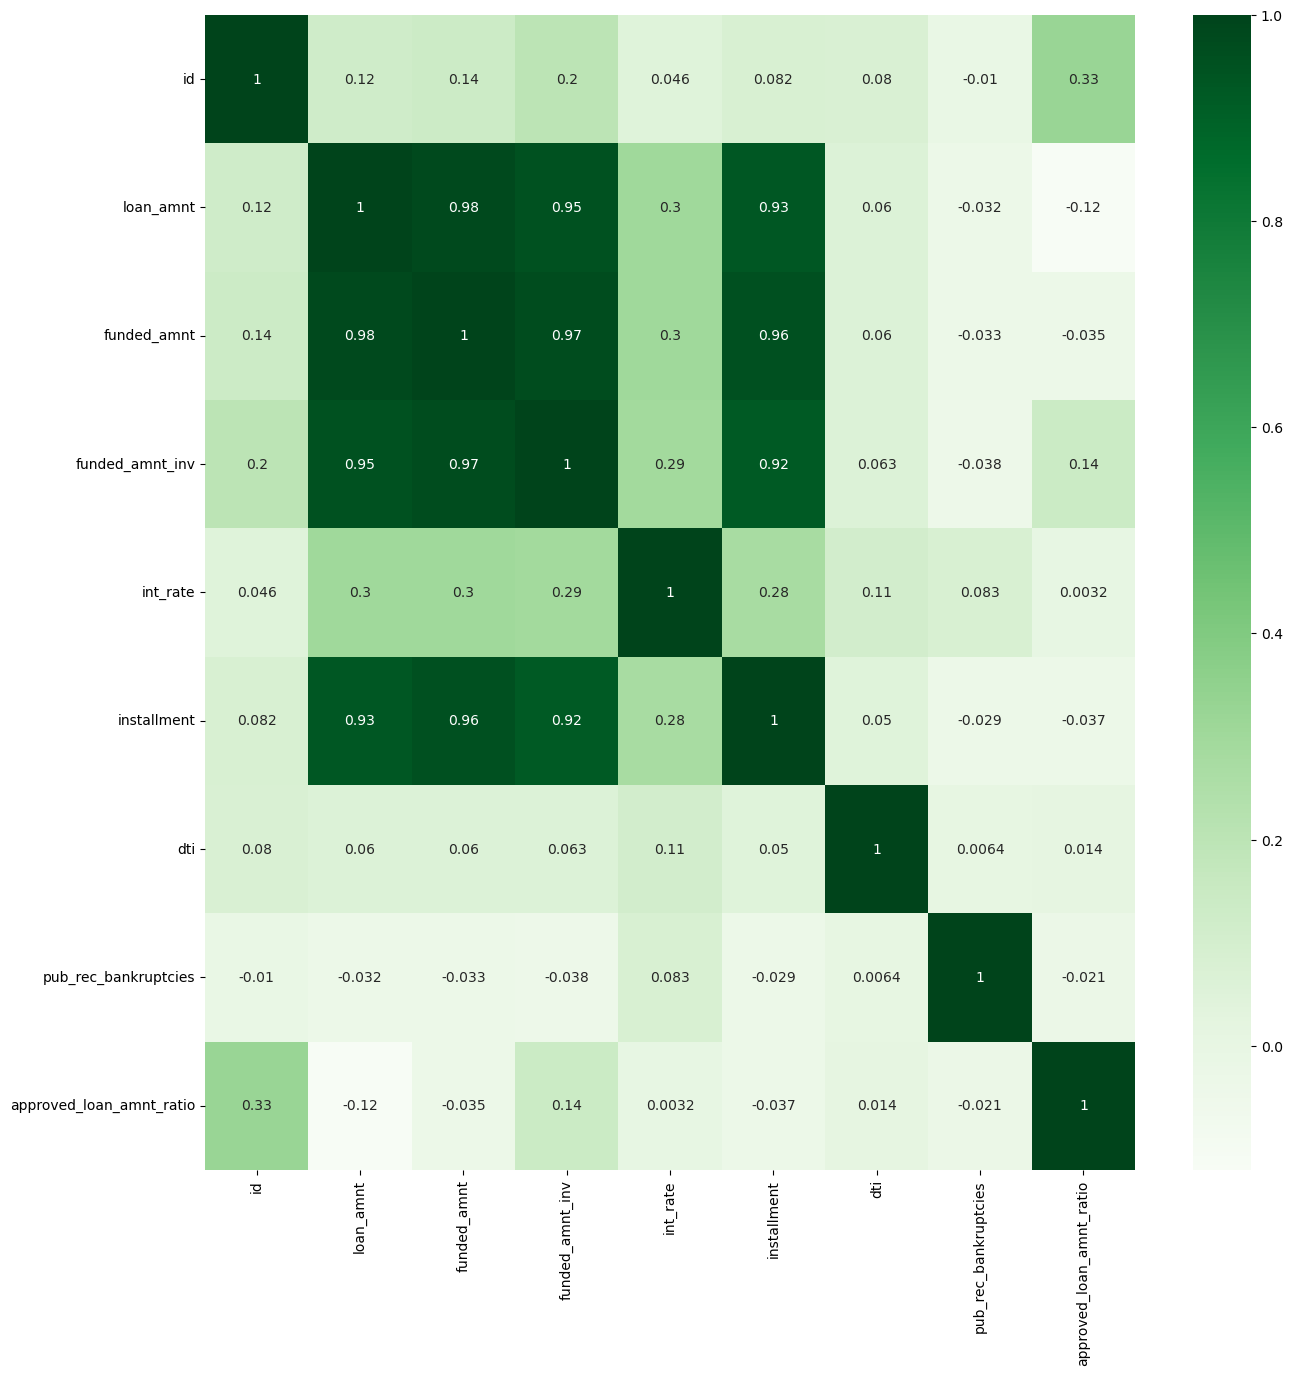

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(data=data.corr(),annot=True,cmap='Greens')
plt.show()

In [79]:
data.dtypes

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
emp_length                          object
home_ownership                      object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
earliest_cr_line            datetime64[ns]
pub_rec_bankruptcies               float64
issue_d_weekday                     object
approved_loan_amnt_ratio           float64
dtype: object

In [80]:
data.shape

(36800, 20)

# Conclusions: 

## Conclusion 1:

**Lending club should reduce the high interest loans for 60 months tenure so that more people take the 60 months tenure and ultimately it generates more revenue as there is a time period difference.**

## Conclusion 2:

**Grades are good indication for detecting defaulters. Lending club should examine more information  from borrowers before issuing loans to Low grade (G to A).**

## Conclusion 3:

**More loans and less interest rate should be provided to small business category because that is when more revenue will be generated and GDP of a country goes up eventually increasing the currency value and the stock prices of the company and more returns come back to you.**

## Conclusion 4:

**More loans and less interest rate should be provided to housing loans because housing loans can vary from 1 to 30 years and if less interest rate is provided eventually on a long term the company can make money.**

